    Track Number                  Track Name  Popularity  Duration
1             36         20191009 I Like Her          73    136888
2             24                    20190724          70     70097
3              1                    20180512          64    247663
4             39     20191012 Fooled By Love          62    197719
5              3                    20180701          61    125614
6             37  20191010 No Doubt About It          61    182602
7              5                  20180702 2          60    157507
8             38   20191011 You Made The Bed          60    133731
9              2                    20180529          60    151258
10             6                    20180816          59    135097
11             9                    20180927          59     79162
12            11                    20181002          59     32945
13             4                    20180702          59    140515
14            10                    20180930          59    18

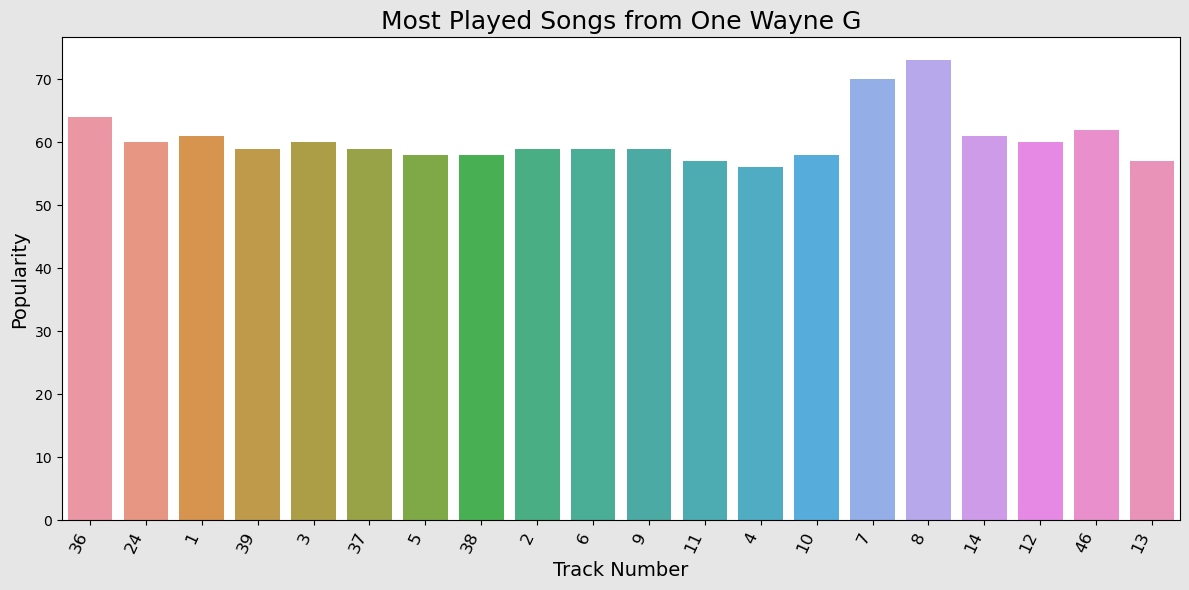

In [2]:
import os
from dotenv import load_dotenv
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

# Set up the Spotify API credentials
client_id = os.environ.get('SPOTIFY_CLIENT_ID')
client_secret = os.environ.get('SPOTIFY_CLIENT_SECRET')

if not client_id or not client_secret:
    print("Missing Spotify API credentials")
    exit()

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Search for the album by Mac DeMarco
results = sp.search(q='artist:Mac DeMarco album:One Wayne G', type='album')
if not results['albums']['items']:
    print("Album not found")
    exit()
album_id = results['albums']['items'][0]['id']

# Get the tracks from the album
tracks = sp.album_tracks(album_id)

# Create a list of lists containing the track name, popularity, and duration
track_list = []
for index, track in enumerate(tracks['items'], start=1):
    if not track['name']:
        continue
    track_info = sp.track(track['id'])
    popularity = track_info['popularity'] if 'popularity' in track_info else 0
    track_list.append([index, track['name'], popularity, track['duration_ms']])

# Create a pandas DataFrame from the track list
df = pd.DataFrame(track_list, columns=['Track Number', 'Track Name', 'Popularity', 'Duration'])

# Sort the DataFrame by popularity in descending order
df = df.sort_values(by='Popularity', ascending=False)

# Reset the index to start from 1
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1

# Set the gray color palette
sns.set_palette("gray")

# Create the bar plot with a gray background
plt.figure(figsize=(12, 6), facecolor='0.9')
ax = sns.barplot(x="Track Number", y="Popularity", data=df.head(20))
ax.set_title("Most Played Songs from One Wayne G", fontsize=18)
ax.set_xlabel("Track Number", fontsize=14)
ax.set_ylabel("Popularity", fontsize=14)
ax.set_xticklabels(df.head(20)['Track Number'], rotation=65, ha='right', fontsize=12)
plt.subplots_adjust(bottom=0.4)
plt.tight_layout()
plt.savefig("Top_20_tracks.png")

df_top20 = df.head(20)
print(df_top20)
